This notebook tests my agent guideline markdown file.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)
n_rows = 200

# 1. Generate IDs
ids = range(1001, 1001 + n_rows)

# 2. Generate Dates
start_date = datetime(2024, 1, 1)
date_list = [start_date + timedelta(days=int(x)) for x in np.random.randint(0, 365, n_rows)]

# 3. Generate Groups (Sepsis vs Control)
groups = np.random.choice(['Control', 'Sepsis'], size=n_rows, p=[0.6, 0.4])

# 4. Generate WBC Counts (Higher for Sepsis to make the plot interesting)
wbc_counts = []
for g in groups:
    if g == 'Control':
        val = np.random.normal(7.0, 2.0)
    else:
        val = np.random.normal(14.0, 4.0)
    wbc_counts.append(max(val, 0.1))

# Create DataFrame with "messy" names to test your guidelines
df = pd.DataFrame({
    'PatientID': ids,
    'Date_Admitted': date_list,
    'Group_Assignment': groups,
    'WBC_Count': np.round(wbc_counts, 1)
})

# Save to CSV
df.to_csv('dummy_vitals.csv', index=False)

print(f"✅ Created 'dummy_vitals.csv' with {len(df)} rows.")
print("Original Columns:", df.columns.tolist())

✅ Created 'dummy_vitals.csv' with 200 rows.
Original Columns: ['PatientID', 'Date_Admitted', 'Group_Assignment', 'WBC_Count']


In [2]:
# Clean column names to conform to style guide
df = df.rename(columns={
    'PatientID': 'patient_id',
    'Date_Admitted': 'date_admitted',
    'Group_Assignment': 'group_assignment',
    'WBC_Count': 'wbc_count'
})

# Verify new column names
print("Cleaned column names:", df.columns.tolist())
df.head()

Cleaned column names: ['patient_id', 'date_admitted', 'group_assignment', 'wbc_count']


,patient_id,date_admitted,group_assignment,wbc_count
0,1001,2024-04-12,Control,6.5
1,1002,2024-12-14,Control,4.5
2,1003,2024-09-27,Control,10.3
3,1004,2024-04-16,Control,4.1
4,1005,2024-03-12,Sepsis,12.2


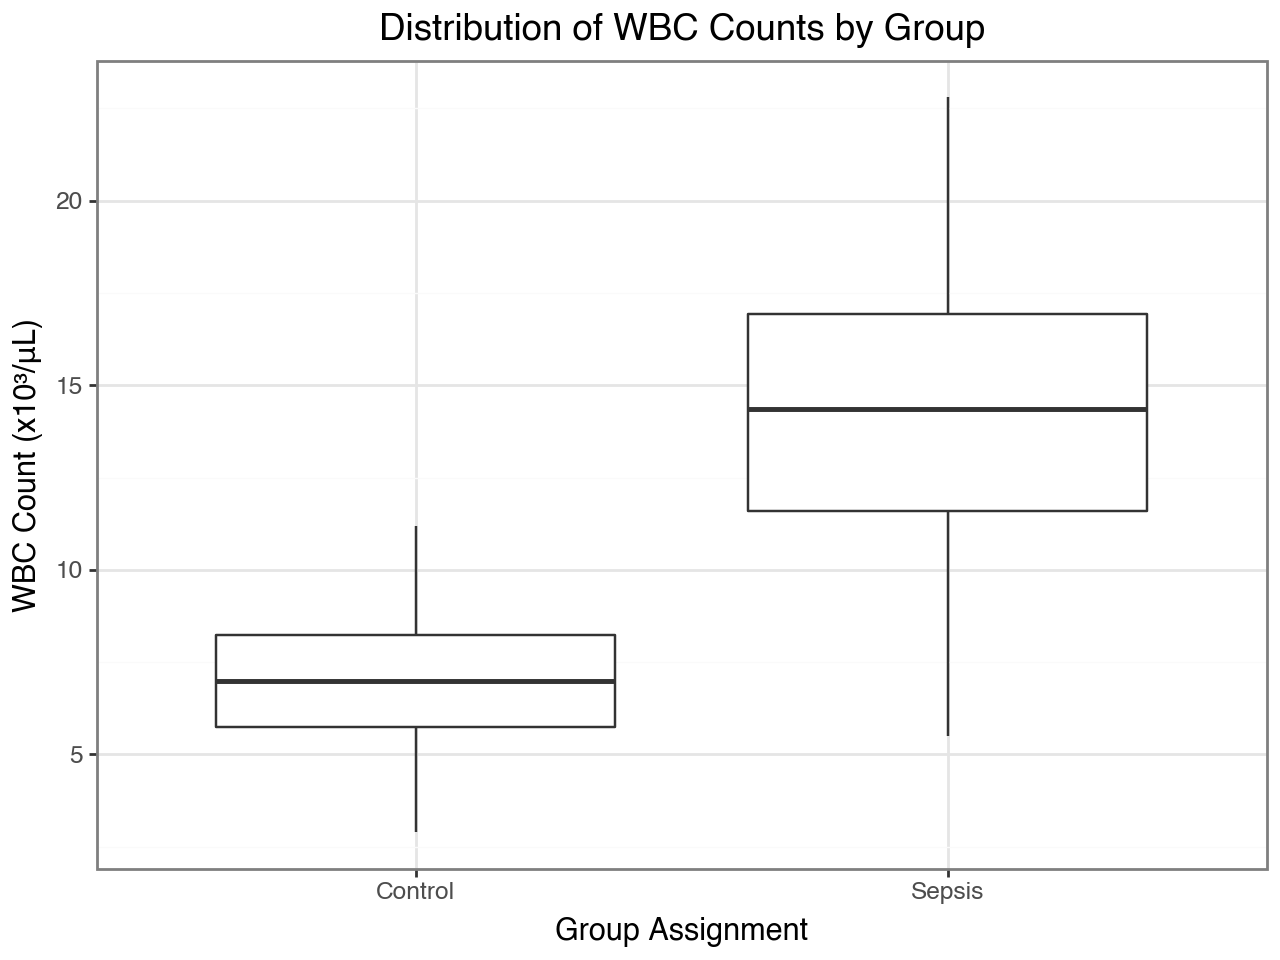

In [3]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme_bw

# Create boxplot of WBC counts by group
(
    ggplot(df, aes(x='group_assignment', y='wbc_count'))
    + geom_boxplot()
    + labs(
        title='Distribution of WBC Counts by Group',
        x='Group Assignment',
        y='WBC Count (x10³/μL)'
    )
    + theme_bw()
)